In [1]:
import torch
from torchvision import datasets, transforms

# Define data transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize tensor with mean and std
])

# Download and load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Download and load the MNIST test dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

c:\Users\5c1cz\Desktop\gg\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(dir(train_dataset.data))
flat_data = train_dataset.data.flatten(1)
flat_data[0]

['H', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rfloordiv__', '__rlshift__', '__rmatmul__', '__rmod__', '__rmul_

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 1

In [3]:
from sklearn.decomposition import PCA

pcaResult = PCA().fit(flat_data)

In [4]:
import matplotlib.pyplot as plt
print(dir(pcaResult))
component_count = pcaResult.explained_variance_ratio_[pcaResult.explained_variance_ratio_ > 0.02].size

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_fit', '_fit_full', '_fit_svd_solver', '_fit_truncated', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_n_features_out', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'components_', 'copy', 'explained_variance_', 'exp

In [5]:
pca_result = PCA(component_count).fit_transform(flat_data)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from random import sample

standardized_pca_result = StandardScaler().fit_transform(pca_result)
standardized_pca_result

tsne = TSNE(n_components=2, perplexity=40).fit_transform(standardized_pca_result[:1000])
tsne

array([[-13.252211  ,   0.59173506],
       [-26.619154  ,  -0.27609602],
       [  7.5397534 , -14.890504  ],
       ...,
       [-22.188805  ,  -7.4897704 ],
       [-15.865984  ,   6.7225065 ],
       [-19.425308  , -12.629859  ]], dtype=float32)

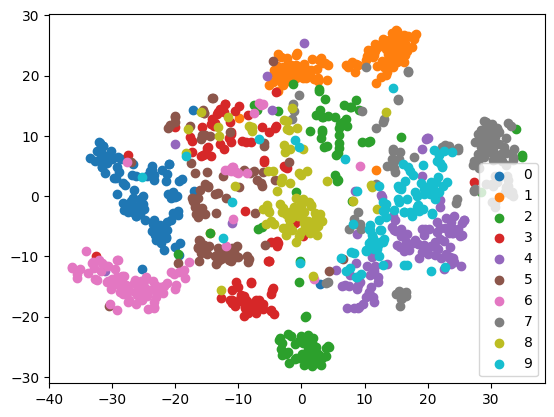

In [7]:

numpy_targets = train_dataset.targets.numpy()[:1000]
import numpy as np

labels = []

plt.show()

for label in set(numpy_targets):
    label_indexes = np.where(numpy_targets == label)
    x, y = zip(*tsne[label_indexes])
    plt.scatter(x, y)
    labels.append(label)

plt.legend(labels)
    
    # plt.scatter()

In [8]:
np.savetxt("tsne", tsne)

In [9]:
result = []

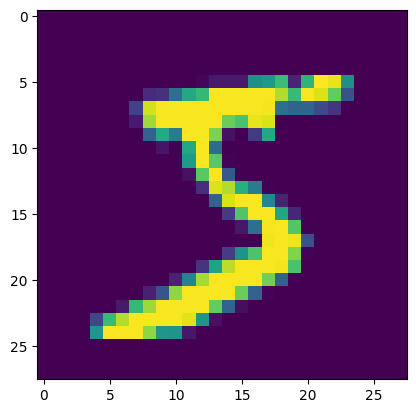

In [10]:
plt.imshow(train_dataset.data[0])

In [11]:
import io

img_bytes = io.BytesIO()
plt.savefig(img_bytes, format='png')
plt.close()

(array([  4,  19,  22,  33,  43,  45,  48,  54,  57,  80,  87, 110, 116,
       133, 153, 154, 162, 167, 170, 172, 176, 183, 195, 226, 227, 247,
       264, 267, 280, 282, 285, 304, 313, 319, 322, 334, 344, 346, 350,
       362, 364, 374, 383, 389, 409, 419, 423, 424, 428, 434, 441, 460,
       471, 482, 487, 501, 520, 525, 529, 550, 566, 580, 583, 589, 595,
       600, 601, 621, 626, 631, 641, 687, 704, 707, 727, 741, 744, 755,
       763, 764, 772, 782, 788, 793, 800, 806, 812, 822, 826, 827, 864,
       887, 900, 902, 929, 930, 932, 940, 974, 980], dtype=int64),)
(array([  4,  19,  22,  33,  43,  45,  48,  54,  57,  80,  87, 110, 116,
       133, 153, 154, 162, 167, 170, 172, 176, 183, 195, 226, 227, 247,
       264, 267, 280, 282, 285, 304, 313, 319, 322, 334, 344, 346, 350,
       362, 364, 374, 383, 389, 409, 419, 423, 424, 428, 434, 441, 460,
       471, 482, 487, 501, 520, 525, 529, 550, 566, 580, 583, 589, 595,
       600, 601, 621, 626, 631, 641, 687, 704, 707, 727, 741, 744,

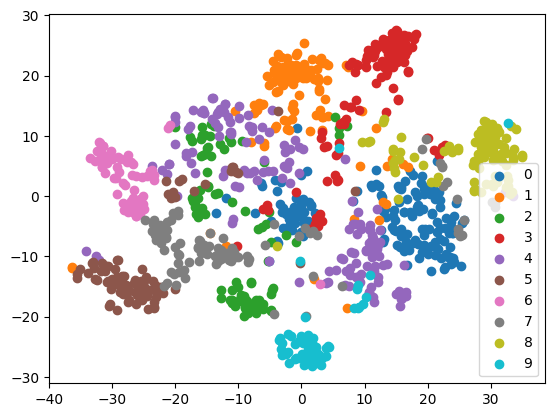

In [12]:

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import numpy as np

labels = []

n_clusters = 10
clustering = KMeans(n_clusters=10).fit(standardized_pca_result[:1000])
plt.show()


for label in set(clustering.labels_):
    labeled = tsne[clustering.labels_ == label]
    x, y = zip(*labeled)
    plt.scatter(x, y)
    labels.append(label)
    print(label_indexes)

plt.legend(labels)
result = []
for i, x in enumerate(tsne):
    result.append([clustering.labels_[i]])
np.savetxt("kmeans", result)
    # plt.scatter()

In [13]:
np.savetxt('original', numpy_targets)

In [14]:

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
# measure for clusterings with different mappings

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(clustering.labels_, numpy_targets)
print("Adjusted Rand Index (ARI):", ari)

# Calculate Adjusted Mutual Information (AMI)
ami = adjusted_mutual_info_score(clustering.labels_, numpy_targets)
print("Adjusted Mutual Information (AMI):", ami)

Adjusted Rand Index (ARI): 0.2982662055749614
Adjusted Mutual Information (AMI): 0.4376229838220604


In [15]:
from IPython.display import Javascript
import json

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


tsneResults = json.dumps(tsne.tolist(), cls=NumpyEncoder)
originalLabels = json.dumps(numpy_targets, cls=NumpyEncoder)
#runs arbitrary javascript, client-side
Javascript(f"""
           window.tsneResults={tsneResults}
           window.originalLabels={originalLabels}
           """)

<IPython.core.display.Javascript object>

In [16]:
import io
import matplotlib.pyplot as plt
from fastapi import FastAPI, Response
from fastapi.staticfiles import StaticFiles
import numpy as np
import uvicorn
import asyncio
from fastapi.middleware.cors import CORSMiddleware


app = FastAPI()


@app.get("/prediction")
async def root():
    return np.loadtxt("kmeans",).tolist()

@app.get("/tsne")
async def root():
    return np.loadtxt("tsne",).tolist()

@app.get("/original")
async def root():
    return np.loadtxt("original",).tolist()

@app.get("/image/{item_idx}")
async def image(item_idx: int):
    print(item_idx)
    img_bytes = io.BytesIO()
    plt.imshow(train_dataset.data[item_idx])
    plt.savefig(img_bytes, format='png')
    plt.close()

    # Set the content type header to image/png
    response = Response(content=img_bytes.getvalue(), media_type="image/png")
    return response

app.mount("/", StaticFiles(directory="static"), name="static")

origins = [
    "*",
]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

loop = asyncio.get_event_loop()
config = uvicorn.Config(app, loop=loop)
server = uvicorn.Server(config)
loop.create_task(server.serve())

<Task pending name='Task-5' coro=<Server.serve() running at c:\Users\5c1cz\Desktop\gg\.venv\lib\site-packages\uvicorn\server.py:67>>

189
INFO:     127.0.0.1:55244 - "GET /image/189 HTTP/1.1" 200 OK
704
INFO:     127.0.0.1:55269 - "GET /image/704 HTTP/1.1" 200 OK
409
INFO:     127.0.0.1:55269 - "GET /image/409 HTTP/1.1" 200 OK
987
INFO:     127.0.0.1:55269 - "GET /image/987 HTTP/1.1" 200 OK
468
INFO:     127.0.0.1:55269 - "GET /image/468 HTTP/1.1" 200 OK
770
INFO:     127.0.0.1:55269 - "GET /image/770 HTTP/1.1" 200 OK
418
INFO:     127.0.0.1:55269 - "GET /image/418 HTTP/1.1" 200 OK
579
INFO:     127.0.0.1:55276 - "GET /image/579 HTTP/1.1" 200 OK
940
INFO:     127.0.0.1:57425 - "GET /image/940 HTTP/1.1" 200 OK
687
INFO:     127.0.0.1:57425 - "GET /image/687 HTTP/1.1" 200 OK
887
INFO:     127.0.0.1:57425 - "GET /image/887 HTTP/1.1" 200 OK
364
INFO:     127.0.0.1:57425 - "GET /image/364 HTTP/1.1" 200 OK
370
INFO:     127.0.0.1:57425 - "GET /image/370 HTTP/1.1" 200 OK
570
INFO:     127.0.0.1:57425 - "GET /image/570 HTTP/1.1" 200 OK
788
INFO:     127.0.0.1:57425 - "GET /image/788 HTTP/1.1" 200 OK
246
INFO:     127.0.0.1:5

In [ ]:
from IPython.display import HTML

javascript = ""
with open("test.js") as f:
    javascript = f"""
    <script type="module">
        {f.read()}
    </script>
"""

html = """
<script src="https://cdn.tailwindcss.com"></script>
<style>
.hovered {
    stroke: 1px red;
}
.boxItem {
    flex: 0 0 50%;
}
</style>
<div class="p-4">
    <button>jak to ma niby co</button>
</div>
<h1 class="text-3xl font-bold underline">
    Hello world!!!!
</h1>
<div class="flex w-100">
<svg class="boxItem" id="my_please_select_svg"></svg>

<image class="boxItem" id="display"></image>
</div>
"""
HTML(javascript + html)

INFO:     Started server process [2744]
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
